In [280]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [281]:
# Load the Titanic dataset
data = pd.read_csv("titanic.csv")

In [282]:
# Copy the data to avoid modifying the original data
df = data.copy()

In [283]:
# Number of Rows and Columns 
df.shape

(891, 12)

In [284]:
# Print first five rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [285]:
# Add new Column
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [286]:
# Number of Rows and Columns 
df.shape

(891, 13)

In [287]:
# For Null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
dtype: int64

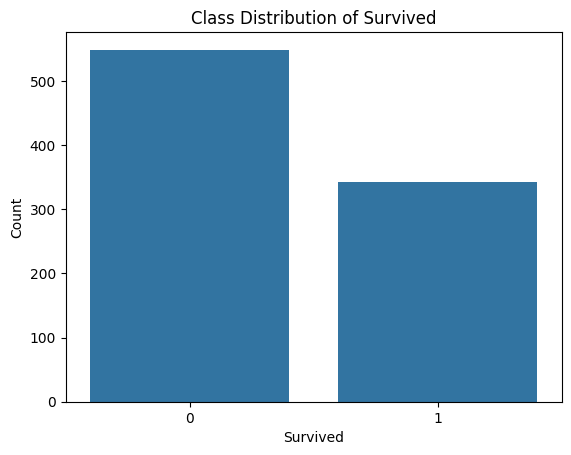

In [288]:
# Check Data Imbalance
sns.countplot(x='Survived', data=data, )
plt.title("Class Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [289]:
# Preprocess the dataset
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)  # Drop non-useful columns
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to numeric
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target

In [290]:
df.head()

,Survived,Pclass,Age,Fare,Family_Size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,True,False,True
1,1,1,38.0,71.2833,2,False,False,False
2,1,3,26.0,7.9250,1,False,False,True
3,1,1,35.0,53.1000,2,False,False,True
4,0,3,35.0,8.0500,1,True,False,True


In [291]:
# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

In [292]:
# Oversampling for data balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

In [293]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [294]:
# Define a Model
rf_model = RandomForestClassifier(random_state=42)
XGB_model = XGBClassifier(random_state=42, eval_metric='logloss')


In [295]:
# Hyperparameter tuning with GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [296]:
# Hyperparameter tuning with GridSearchCV
param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search_XGB = GridSearchCV(estimator=XGB_model, param_grid=param_grid_XGB, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [297]:
# Best parameters from grid search
print("Best parameters for rf:", grid_search_rf.best_params_)
print("Best parameters for XGB:", grid_search_XGB.best_params_)

Best parameters for rf: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for XGB: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [298]:
# Predict using the best model
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_XGB = grid_search_XGB.best_estimator_.predict(X_test)

In [299]:
# Calculate accuracy score
rf_accuracy = accuracy_score(y_test, y_pred_rf)
XGB_accuracy = accuracy_score(y_test, y_pred_XGB)
print(f"Accuracy Score of rf_model: {rf_accuracy:.2f}%")
print(f"Accuracy Score of XGB_model: {XGB_accuracy:.2f}%")

Accuracy Score of rf_model: 0.88%
Accuracy Score of XGB_model: 0.90%
